# Guided project: exit surverys
In this project I look at data from the exit surveys from the employees of the Department of Education , Training, and Employment [link](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the Technical and Further Eduation institute [link](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) in Queensland, Australia. <br/> The questions I ask are 
<u1>
<li> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there londer? </li>
<li> Are younder employees risigning due to some kind of dissatisfation? What about older employees? </li>
</u1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey:

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [5]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


tafe_survey:

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


There are a couple of things that will need to be cleaned: both surveys have a lot of NaNs. What will be the best strategy to deal with them? Remove columns, remove rows, replace by mean, replace by median,...? Furthermore I see that the second survey, "tafe" has very long column names. I will rename them as they are not very handy.<br/> First I will change `Not Stated` to NaNs when reading in the files. <br/> Next I will look at the columns and drop those that I won't use for the analysis.

In [8]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

These are the columns that I kept:

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [10]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

And these are the columns that have been dropped. Often there are multiple columns giving the same information. Other columns displayed mostly NaNs. Some are just irrelevant to the research questions. Eventually I want to combine the two datasets, therefore I filter for relevant columns that both sets have in common.

In [11]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [12]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

## Renaming the columns:

Eventually, I want to combine the two dataframes. Therefore, I need to rename the columns such that the two dataframes column names coincide.

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ','_').str.lower()

In [14]:
dictionary_tafe_columns = {'Record ID': 'id',
                           'CESSATION YEAR': 'cease_date',
                           'Reason for ceasing employment': 'separationtype',
                           'Gender. What is your Gender?': 'gender', 
                           'CurrentAge. Current Age': 'age', 
                           'Employment Type. Employment Type': 'employment_status', 
                           'Classification. Classification': 'position', 
                           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                          }
tafe_survey_updated = tafe_survey_updated.rename(dictionary_tafe_columns, axis = 1)

In [15]:
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


## Removing more data that will not be used:

The research question focuses employments that were ended via resignation.

In [17]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [20]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

I would like to have a column of the format yyyy and not mm/yyyy:

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations[dete_resignations['cease_date'].isnull()]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
683,685,Resignation,NaN,2011.0,2012.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
694,696,Resignation,NaN,2012.0,NaN,Teacher Aide,NaN,Metropolitan,NaN,Casual,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
704,706,Resignation,NaN,2006.0,2007.0,Teacher Aide,NaN,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
709,711,Resignation,NaN,NaN,NaN,Teacher,Primary,Central Office,Education Queensland,Permanent Full-time,...,True,True,False,Female,51-55,NaN,NaN,NaN,NaN,NaN
724,726,Resignation,NaN,1984.0,NaN,Teacher,Primary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
770,772,Resignation,NaN,1987.0,1987.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,False,False,True,Female,61 or older,NaN,NaN,NaN,NaN,NaN
774,776,Resignation,NaN,2005.0,2005.0,Teacher Aide,NaN,Central Queensland,NaN,Permanent Part-time,...,False,False,True,Female,41-45,NaN,NaN,NaN,NaN,NaN
788,790,Resignation,NaN,1990.0,2010.0,Teacher,Secondary,Metropolitan,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
791,793,Resignation,NaN,2007.0,2007.0,Public Servant,A01-A04,Metropolitan,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
797,799,Resignation,NaN,2000.0,2013.0,Public Servant,A01-A04,South East,NaN,Permanent Part-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN


There ar 11 rows with unkown cease date. For the first research question, I will need to know for how long a person was employed. As these are only 11 unknown dates, I will drop these rows:

In [22]:
dete_resignations = dete_resignations[~dete_resignations['cease_date'].isnull()].copy()

In [23]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

In [24]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending = False)

2013.0    10
2012.0    20
2011.0    23
2010.0    17
2009.0    13
2008.0    22
2007.0    20
2006.0    12
2005.0    14
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     8
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     3
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     4
1989.0     4
1988.0     4
1986.0     3
1985.0     3
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Most resignations were in recent years, which hints at people, who recently joined, not being happy at the job. Next, I look at he tafe data set:

<IPython.core.display.Javascript object>


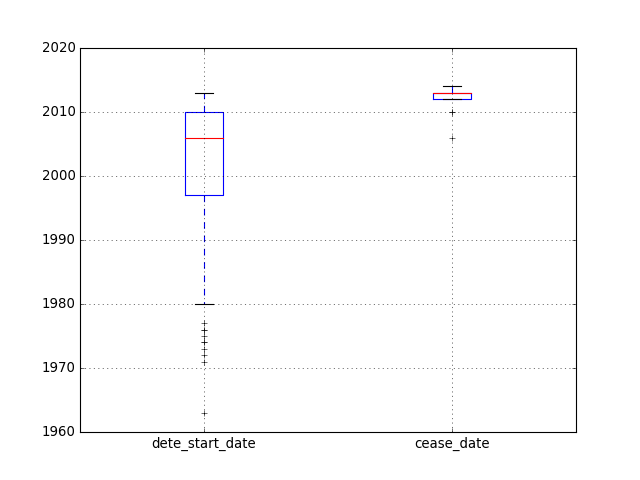

In [25]:
dete_resignations.boxplot(column = ['dete_start_date','cease_date'])

The boxplot confirms what `value_counts` of the start and end date already have shown: employees that recently joined are more likely to resign. In the last few years a lot of people resign; mostly employees that worked for a short period of time. A thorough analysis will follow later. This part is dedicated to data cleaning and the dates for start and end time look fine.

In [26]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

I will now look at why employees has resigned. The relevant columns to determine why the employee has ceased the employment are:<br/>
`dete`:
<u1>
<li>`job_dissatisfaction`
<li> `dissatisfaction_with_the_department`
<li> `physical_work_environment`
<li> `lack_of_recognition`
<li> `lack_of_job_security`
<li> `work_location`
<li> `employment_conditions`
<li> `work_life_balance`
<li> `workload`
<u1/>
`tafe`:
<u1>
<li> `Contributing Factors. Dissatisfaction`
<li>`Contributing Factors. Job Dissatisfaction`
<u1/>

In [27]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [28]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
def bool_change(item):
    if item == '-':
        return False
    elif pd.isnull(item):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(bool_change).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [30]:
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

False    154
True     146
Name: dissatisfied, dtype: int64

Now all columns that contribute to the research questions display only the values `True`, `False`, or `NaN`. The column `dissatisfied` is a combination of all the relevant columns, which follows the following rules:
<u1>
<it> `dissatisfied` is `True` if any of the relevant columns is `True`
<it> `dissatisfied` is `False` if all relevant columns are `False`
<it> `dissatisfied` is `NaN` if all relevant columns are `NaN`
<u1>
`True` refers to having resigned because of some sort of dissatisfaction. `False` refers to having resigned for other reasons than dissatisfaction. `NaN` indicates that there is no information.

In [31]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

I have combined the two dataframes to compare them better. First I need to see whether the combining the two dataframes worked out well:

In [32]:
combined.head(3)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


In [33]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           31
classification                                         155
region                                                 254
role_start_date                                        264
dete_start_date                                        273
role_service                                           290
career_move_to_public_sector                           300
employment_conditions                                  300
work_location                                          300
lack_of_job_security                                   300
job_dissatisfaction                                    300
dissatisfaction_with_the_department                    3

In [34]:
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [35]:
combined_updated.head(2)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation


In [36]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   77
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [37]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [38]:
combined_updated['institute_service'].value_counts(dropna = False)

 1.0     159
 3.0      83
NaN       77
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [39]:
def service_experience(item):
    if pd.isnull(item):
        return np.nan
    elif item < 3:
        return 'New'
    elif item <= 6:
        return 'Experienced'
    elif item <= 10:
        return 'Established'
    
    else:
        return 'Veteran'
combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_experience)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [40]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    395
True     237
NaN        8
Name: dissatisfied, dtype: int64

`False` is more frequent than `True`, therefore I will replace the `NaN` with `False`. 

In [41]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [42]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     237
Name: dissatisfied, dtype: int64

In [43]:
pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
#

<IPython.core.display.Javascript object>


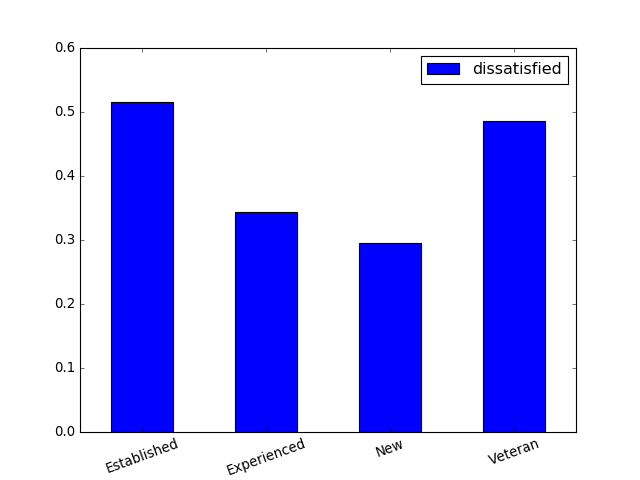

In [48]:
pivot.plot(kind = 'bar',rot = 20)

In the plot, we see that employees who have been working for several years rather leave dissatisfied that those who have been working there for 3 years or less.